# Exploring the appartments market in Sofia the capital of Bulgaria

## 1 Aims, objectives and background

### 1.1 Introduction

This project is inspired by the idea of finding the best value for money apartment in the capital of Bulgaria, Sofia. The house market in Bulgaria has been consistently growing for the past decade and the prices has been growing accordingly. Sofia is the biggest city in Bulgaria and it’s the fastest growing as well. Many Bulgarians migrate to Sofia to find better paid job and quality of life. It’s a common treat of Bulgarians to own their homes and those who can afford it jump into the opportunity as soon as it’s presents itself. 

The problem is that prices and value vary and it’s hard even for the most educated to really grasp the market. Therefore, the goal of this project is to help those people by providing them a tool (ML algorithm) that can predict the price of an apartment based on its features. Having that tool people would much easily estimate if the property is over or undervalued.       

### 1.2 Aims and objectives

The main objective of the project is to explore the real estate market in Sofia and in particular the apartments’ one. Moreover, the goal is to find best value apartments and those which are overpriced based on the data exploratory techniques. Aiming toward that goal the major objectives of the project are:

1.	To find an appropriate website that is a good sample and represent the house market of Sofia. 
2.	To build a web crawler and collect the data.
3.	For the purpose of the web crawler to find proxies servers.
4.	To Clean the data and translate it to English.
5.	To explore the data by data exploratory techniques.
6.	To visualize and present those findings.
7.	To implement Machine Learning algorithm that is efficient and accurate.

### 1.3 Data

#### 1.3.1 Data requirements

For this project the data requirements are the features of an apartment. Mainly, the location, area, rooms, year of construction, property features as electricity and ect. and the price. 

#### 1.3.2 Choice of a website for web crawling

Based on my personal knowledge and research, one of the biggest and well know websites that fulfill the data requirements is https://alo.bg. This is a well-known website that serves as a public publishing of all kind of advertising including real estates. 

Two more options were considered for the data set:

* The first option https://www.imot.bg/pcgi/imot.cgi where the features of the real estates were not easy to get since they are combined into plain text and might be a problem to extract them individually. As a pro this website consists more ads.
* The second option https://www.imoti.net/bg has almost the same ads a the chosen one, however the website is considerably slower and the data is not as easy to get.


That website consists over 4 thousand ads of apartment in Sofia and represent good enough sample of the real estate market.

#### 1.3.4 Limitations and constraints of the data

Although, the data from the website has all the major features there are of interest of the project there are still features that are not available such as:
* Postcode of the property
* Distance to the center, schools, metro stations and other available in proximity facilities
* Number of apartments in the building 
* Not all buildings has a year of construction 


### 1.4 Ethical considerations

#### 1.4.1 Use of data 

Into the terms and conditions of the website there is no clause forbidding webscrapping. Moreover, into their robots.txt there is no Disallow clause that forbids to be webscrapped. 
* The ads listing the apartments are not intellectual property.
* The terms and conditions state that 'you may download and print portions of the Site for your personal, non-commercial use.'

#### 1.4.2 Use and reause of data

The data that is webscrapped from that particular website could not be used commercially. It’s required to individual seek the author of each ad of apartment that would allow to use the data posted.

In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from random import seed
from random import random
from random import randint
from deep_translator import GoogleTranslator
import re
import os

## 2 Webscapping the website

## 2.1 Get list of proxies

Since, the webscrapping requires over 4000 requests for each individual ad to be crawled, there is a big chance that the website would ban my personal IP address. Hence, I will implement requests using proxy servers. The service of my choice provides a webpage that renew all the proxies on 30 minutes interval. Therefore, I will implement a webscrapping to automatically get the proxies and save them to a text file for further usage.
* Scrape webpage with working proxies (paid subscription) that guaranties that all proxies are working. The webservice that provides the proxies is https://free-proxy-list.net/. Since, all free listed proxies are not working or inconsistent I decided to used the premium option and get 3000 working proxies.
* For security reason I am not going to provide my credentials. However, I am providing the code that I wrote to get the proxies and save them into a txt file called ips.txt.


In [2]:
def getListOfProxies():
    
    # check if the list of ips exists
    if os.path.exists('./ips.txt') == False:
        url_prox = "http://list.didsoft.com/get?email=email&pass=password&pid=http3000&showcountry=no"
        ips_raw = getHTML(url_prox)
    
    # write the ips to a file
        ips_file = open('ips.txt',"w") 
        ips_file.writelines("ips\n")
        for i in ips_raw.contents[0].split('\n'):
            ips_file.writelines("{}\n".format(i))    
        ips_file.close() 

    # if the ips from the list and return them    
    proxies_df = pd.read_csv('ips.txt')
    
    return proxies_df


def getProxy():
    proxy = {
      "ip": proxies_df['ips'][randint(1,len(proxies_df['ips'])-1)]
    }
    
    return proxy

#### 2.1.2 List the first 5 proxies 

In [3]:
proxies_df = getListOfProxies()
proxies_df[:5]

ips
0    185.77.221.67:8085
1   81.174.11.159:61743
2     77.83.85.246:8085
3    88.218.65.131:8085
4  168.138.177.148:3128

### 2.2 Webscrapping the apartments

* Get the numbers of pages to be scrapped
* Get the list of all urls to be scrapped
* Extract Data from HTML
* Make a DataFrame of data

In [36]:
# BaseUrl is the domain of the website and the URL is the particular page where apartments in Sofia are listed
baseUrl = 'https://alo.bg/'
URL = "https://www.alo.bg/obiavi/imoti-prodajbi/apartamenti-stai/?region_id=22&location_ids=4342"


def getHTML(url):
    
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/93.0",
               "Upgrade-Insecure-Requests":"1", 
               "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", 
               "Accept-Encoding":"gzip, deflate, br", 
               "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8",
               "DNT":"1"}
    
    proxy = getProxy()
    
    # get the html page
    page = requests.get(url, headers=headers, proxies=proxy)
    
    # parse the text from the request to html with beautifulSoup 
    html = BeautifulSoup(page.content, "html.parser")
    
    return html


def getNumberOfPages(baseUrl):
    
    html = getHTML(baseUrl)
    
    # Single request to the URL to get the number of pages from the pagination buttons
    
    pagination = html.find_all("a", class_="disabled_")[1]
    numberOfPages = int(pagination.text)
    
    print('Number of pages: ',numberOfPages)
    
    return numberOfPages

def getRealEstatesURLs(baseUrl):
    
    individual_urls = []
    numberOfPages = getNumberOfPages(URL)
    
    # Crawl through all the number of pages to get each individual link to the ads
    # There are aprox. 150 pages that contains 30 ads per page. Aprox. 4500 ads in total
    
    for page in range(1, numberOfPages+1):

        html = getHTML(URL+'&page=' + str(page))
        vipItems = html.find_all("div", class_="listvip-item")
        for i in vipItems:
            individual_urls.append(i.get('id').replace('adrows_',''))
            
    return individual_urls    
    

In [37]:
def getPriceFromHTML(html):
    
    # get the price element 
    price = html.find('div', class_='ads-params-price')
    
    # implement a bit of cleanning to get just the integer
    price = price.text.replace(u'\xa0', '').replace(u',', '')
    price = re.findall(r'(\d+)',price)
    
    # return the price if any or return 0
    if len(price) > 0:
        return price[0]
    else:
        return 0
    
def getParamsFromHTML(html):
    
    aparts_dict = {}
    
    # parse the two major elements that contain data
    
    single_row = html.find_all('div', class_='ads-params-row')
    multiple_rows = html.find_all('span', class_='ads-params-multi')
    
    for row in single_row:
        
        param = row.find('span', class_='ads-params-single')
        
        if param:
            # use the description of the element as a key and the params as a value 
            aparts_dict[row.find('div', class_='ads-param-title').text] = param.text
            
        # Find the element that contains the location of the apartment
        
        location = row.find('div',class_="ads-params-cell ads-params-price animation-element bounce-up")
        
        if location:
            
            neighbourhood = row.find('div', class_='ads-param-title').text
            if neighbourhood == 'Местоположение:':
                aparts_dict['Location'] = location.text
 
    # All the options as electricity, elevator, furniture and etc. are in the same element as a block
    # and those options are not available for all apartment, therefore I will use the option as a key  
    # and set the value to 1 if not available.
    
    if len(multiple_rows) > 0:
        for rows in multiple_rows:
            aparts_dict[rows.text] = 1 
    
    # I call separate function with the html that will parse the html and do a little bit of cleanning 
    # and return the price if any as an integer
    
    aparts_dict['price'] = getPriceFromHTML(html)
    
    return aparts_dict


def crawler():
    
    aparts_arr = []
    
    # loop through all individual ads and get the params of the apartments as a dictionary 
    for idx,url_id in enumerate(listOfUrls):
        
        # append the individual id number to the base url
        apartUrl = baseUrl+str(url_id)
        
        # get the html for the ad
        html = getHTML(apartUrl)
        
        # get all params as a dictionary
        dict_of_params = getParamsFromHTML(html)
        
        # append the dictionary to a list 
        aparts_arr.append(dict_of_params)

    return aparts_arr


#### 2.2.1 Get the list of Urls and Scrap the website

In [43]:
# listOfUrls = getRealEstatesURLs(URL)
# list_of_apartments = crawler()

#### 2.2.2 Save scrapped data to dataframe

In [47]:
df_aparts = pd.DataFrame(list_of_apartments)

#### 2.2.3 Check the dataframe

In [48]:
df_aparts.head()

Обява от:                                           Location  \
0  http://koevski.alo.bg  Хаджи Димитър, град София, област  София, (Виж...   
1                    NaN  Оборище, град София, област  София, (Виж Обори...   
2                    NaN          Витоша, град София, област  София\n\t\t\t   
3                    NaN  Овча Купел, град София, област  София, (Виж Ов...   
4                    NaN         Люлин 5, град София, област  София\n\t\t\t   

         Вид на имота: Квадратура: Вид строителство:  \
0  Тристаен апартамент     99 кв.м             Тухла   
1  Двустаен апартамент     75 кв.м             Тухла   
2  Двустаен апартамент     73 кв.м             Тухла   
3  Двустаен апартамент     70 кв.м             Тухла   
4  Тристаен апартамент     88 кв.м            ЕПК/ПК   

                       Година на строителство: Степен на завършеност:  \
0  2022 г. (годината може да е ориентировъчна)       Готов (завършен)   
1  2007 г. (годината може да е ориентировъчна)       Готов (завършен)   
2                                          NaN       Готов (завършен)   
3                                          NaN       Готов (завършен)   
4  1991 г. (годината може да е ориентировъчна)       Готов (завършен)   

  Номер на етажа:          Етаж:  Асансьор  ... Локално отопление  \
0          2 етаж     Непоследен       1.0  ...               NaN   
1          2 етаж     Непоследен       1.0  ...               NaN   
2          6 етаж     Непоследен       1.0  ...               NaN   
3         10 етаж  Последен етаж       NaN  ...               NaN   
4         11 етаж     Непоследен       NaN  ...               NaN   

   Необзаведен  Панорама планина  Саниран  Гараж/Паркомясто  След ремонт  \
0          NaN               NaN      NaN               NaN          NaN   
1          NaN               NaN      NaN               NaN          NaN   
2          NaN               NaN      NaN               NaN          NaN   
3          NaN               NaN      NaN               NaN          NaN   
4          NaN               NaN      NaN               NaN          NaN   

   Замяна/Бартер  Лизинг  Камина  Ипотекиран  
0            NaN     NaN     NaN         NaN  
1            NaN     NaN     NaN         NaN  
2            NaN     NaN     NaN         NaN  
3            NaN     NaN     NaN         NaN  
4            NaN     NaN     NaN         NaN  

[5 rows x 26 columns]

In [57]:
print(f"The dataset has {df_aparts.shape[0]} rows and {df_aparts.shape[1]} columns")

The dataset has 4397 rows and 26 columns


### 2.4 Save data to File

In [70]:
df_aparts.to_csv('apartments_from_alo.csv', index=False)

### 2.5  Import previously scraped data

Import previously scraped data from a file because it takes about 30 minutes to scrape each time and also to ensure consistency and replicable results, for the remainder of the project.

In [84]:
df_from_file = pd.read_csv('apartments_from_alo.csv')
df_from_file.head()

Обява от:                                           Location  \
0  http://koevski.alo.bg  Хаджи Димитър, град София, област  София, (Виж...   
1                    NaN  Оборище, град София, област  София, (Виж Обори...   
2                    NaN          Витоша, град София, област  София\n\t\t\t   
3                    NaN  Овча Купел, град София, област  София, (Виж Ов...   
4                    NaN         Люлин 5, град София, област  София\n\t\t\t   

         Вид на имота: Квадратура: Вид строителство:  \
0  Тристаен апартамент     99 кв.м             Тухла   
1  Двустаен апартамент     75 кв.м             Тухла   
2  Двустаен апартамент     73 кв.м             Тухла   
3  Двустаен апартамент     70 кв.м             Тухла   
4  Тристаен апартамент     88 кв.м            ЕПК/ПК   

                       Година на строителство: Степен на завършеност:  \
0  2022 г. (годината може да е ориентировъчна)       Готов (завършен)   
1  2007 г. (годината може да е ориентировъчна)       Готов (завършен)   
2                                          NaN       Готов (завършен)   
3                                          NaN       Готов (завършен)   
4  1991 г. (годината може да е ориентировъчна)       Готов (завършен)   

  Номер на етажа:          Етаж:  Асансьор  ...  Локално отопление  \
0          2 етаж     Непоследен       1.0  ...                NaN   
1          2 етаж     Непоследен       1.0  ...                NaN   
2          6 етаж     Непоследен       1.0  ...                NaN   
3         10 етаж  Последен етаж       NaN  ...                NaN   
4         11 етаж     Непоследен       NaN  ...                NaN   

   Необзаведен  Панорама планина  Саниран  Гараж/Паркомясто  След ремонт  \
0          NaN               NaN      NaN               NaN          NaN   
1          NaN               NaN      NaN               NaN          NaN   
2          NaN               NaN      NaN               NaN          NaN   
3          NaN               NaN      NaN               NaN          NaN   
4          NaN               NaN      NaN               NaN          NaN   

   Замяна/Бартер  Лизинг  Камина  Ипотекиран  
0            NaN     NaN     NaN         NaN  
1            NaN     NaN     NaN         NaN  
2            NaN     NaN     NaN         NaN  
3            NaN     NaN     NaN         NaN  
4            NaN     NaN     NaN         NaN  

[5 rows x 26 columns]

## 3 Data cleaning, translation and processing

* Translate columns
* make rooms number
* remove sqr.
* type of building diff columns (ml)
* Year building remove text
* building progress
* floor remove text
* the rest of the columns 1 or 0

### 3.1 Translate the columns

Let's strart by translating the columns from Bulgarian to English

In [85]:
def translationFromBgtoEn(arr):
    translated_arr = []
    for sentance in arr:     
        translated_arr.append(GoogleTranslator(source='auto', target='en').translate(sentance))
    return translated_arr

Create a copy of the dataframe from the file

In [126]:
clean_df = df_from_file.copy()

#### 3.1.1 Translate columns

In [127]:
clean_df.columns = translationFromBgtoEn(clean_df.columns)
clean_df.columns

Index(['Listing from:', 'Location', 'Property type:', 'Area:',
       'Type of construction:', 'Year of construction:',
       'Level of completion:', 'Floor number:', 'Floor:', 'Elevator', 'price',
       'Turnkey', 'Furnished', 'TEC', 'Porter / Security', 'Gasified',
       'Local heating', 'Unfurnished', 'Panorama of the mountain',
       'Rehabilitated', 'Garage / Parking space', 'After renovation',
       'Replacement / Barter', 'Leasing', 'Fireplace', 'Mortgaged'],
      dtype='object')

How the dataframe is looking?

In [128]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4397 entries, 0 to 4396
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Listing from:             1688 non-null   object 
 1   Location                  4397 non-null   object 
 2   Property type:            4396 non-null   object 
 3   Area:                     4395 non-null   object 
 4   Type of construction:     4395 non-null   object 
 5   Year of construction:     2613 non-null   object 
 6   Level of completion:      4082 non-null   object 
 7   Floor number:             4192 non-null   object 
 8   Floor:                    3296 non-null   object 
 9   Elevator                  2938 non-null   float64
 10  price                     4397 non-null   int64  
 11  Turnkey                   379 non-null    float64
 12  Furnished                 778 non-null    float64
 13  TEC                       1587 non-null   float64
 14  Porter /

#### 3.2 Clean up the column's names

Removing the chars and unnecessary words from columns 

In [129]:
clean_df.columns = clean_df.columns.map(lambda x: x.replace(':','').split('/')[0].capitalize())

# List the translated columns
clean_df.columns

Index(['Listing from', 'Location', 'Property type', 'Area',
       'Type of construction', 'Year of construction', 'Level of completion',
       'Floor number', 'Floor', 'Elevator', 'Price', 'Turnkey', 'Furnished',
       'Tec', 'Porter ', 'Gasified', 'Local heating', 'Unfurnished',
       'Panorama of the mountain', 'Rehabilitated', 'Garage ',
       'After renovation', 'Replacement ', 'Leasing', 'Fireplace',
       'Mortgaged'],
      dtype='object')

##### Percentage of missing values per column in ascending order

In [130]:
clean_df.isnull().mean().round(4).mul(100).sort_values()

Location                     0.00
Price                        0.00
Property type                0.02
Area                         0.05
Type of construction         0.05
Floor number                 4.66
Level of completion          7.16
Floor                       25.04
Elevator                    33.18
Year of construction        40.57
Listing from                61.61
Tec                         63.91
Garage                      77.21
Unfurnished                 77.80
Gasified                    77.87
Rehabilitated               80.81
Furnished                   82.31
Local heating               88.70
Porter                      90.06
Panorama of the mountain    91.13
Turnkey                     91.38
After renovation            93.59
Leasing                     98.20
Fireplace                   99.36
Replacement                 99.73
Mortgaged                   99.91
dtype: float64

#### 3.3 Drop columns
Drop column Listing from (this is the name of the agency that published the ad) because over 60% of the ads missed one and it's not important for the project at this stage.

In [131]:
clean_df = clean_df.drop('Listing from', axis=1)

In [132]:
clean_df.head()

Location        Property type  \
0  Хаджи Димитър, град София, област  София, (Виж...  Тристаен апартамент   
1  Оборище, град София, област  София, (Виж Обори...  Двустаен апартамент   
2          Витоша, град София, област  София\n\t\t\t  Двустаен апартамент   
3  Овча Купел, град София, област  София, (Виж Ов...  Двустаен апартамент   
4         Люлин 5, град София, област  София\n\t\t\t  Тристаен апартамент   

      Area Type of construction                         Year of construction  \
0  99 кв.м                Тухла  2022 г. (годината може да е ориентировъчна)   
1  75 кв.м                Тухла  2007 г. (годината може да е ориентировъчна)   
2  73 кв.м                Тухла                                          NaN   
3  70 кв.м                Тухла                                          NaN   
4  88 кв.м               ЕПК/ПК  1991 г. (годината може да е ориентировъчна)   

  Level of completion Floor number          Floor  Elevator   Price  ...  \
0    Готов (завършен)       2 етаж     Непоследен       1.0  150000  ...   
1    Готов (завършен)       2 етаж     Непоследен       1.0  150000  ...   
2    Готов (завършен)       6 етаж     Непоследен       1.0  139000  ...   
3    Готов (завършен)      10 етаж  Последен етаж       NaN   97000  ...   
4    Готов (завършен)      11 етаж     Непоследен       NaN   98500  ...   

   Local heating  Unfurnished  Panorama of the mountain  Rehabilitated  \
0            NaN          NaN                       NaN            NaN   
1            NaN          NaN                       NaN            NaN   
2            NaN          NaN                       NaN            NaN   
3            NaN          NaN                       NaN            NaN   
4            NaN          NaN                       NaN            NaN   

   Garage   After renovation  Replacement   Leasing  Fireplace  Mortgaged  
0      NaN               NaN           NaN      NaN        NaN        NaN  
1      NaN               NaN           NaN      NaN        NaN        NaN  
2      NaN               NaN           NaN      NaN        NaN        NaN  
3      NaN               NaN           NaN      NaN        NaN        NaN  
4      NaN               NaN           NaN      NaN        NaN        NaN  

[5 rows x 25 columns]

#### 3.4 Clean the location column

The location column consists of the name of the neighborhood, name of the city, name of the region and that used to be in a hyperlink pointing the location on the map. 
* First, I am going to take the name of the neighborhood.   
* Second, I will take the unique names of the neighborhoods and translate them into English
* Third, I am going to map them to Bulgarian and use that dictionary to change the names of all the row. 

I will use this technique because translating all rows one by one it will up to 20 minutes but if I just find the unique ones and translate them and then map them back to the dataframe it will just take a minute. 

In [115]:
clean_df.Location[0]

'Хаджи Димитър, град София, област  София, (Виж Хаджи Димитър на картата)\n'

In [28]:
test_df_clean['Location'] = test_df_clean['Location'].apply(lambda x: x.split(',')[0])

### Make type of property a numeric column
* List all types of property 
* Translate them 
* replace them with numbers

In [37]:
# List all types of properties
type_of_prop = test_df_clean['Type of property'].unique()
type_of_prop

array(['Двустаен апартамент', 'Тристаен апартамент',
       'Многостаен апартамент', 'Мезонет', 'Едностаен апартамент',
       'Ателие/Студио'], dtype=object)

In [38]:
# Translate them
def translateList(arr):
    translated_list = []
    for el in arr:
        translated_list.append(GoogleTranslator(source='auto', target='en').translate(el))
    return translated_list

tr_type_of_prop = translateList(type_of_prop)
mapped_tp = {}
for indx, i in enumerate(type_of_prop):    
    mapped_tp[i] = tr_type_of_prop[indx]
    
mapped_tp    

{'Двустаен апартамент': 'Two room apartment',
 'Тристаен апартамент': 'Two-bedroom apartment',
 'Многостаен апартамент': 'Large apartment',
 'Мезонет': 'Maisonette',
 'Едностаен апартамент': 'One-room apartment',
 'Ателие/Студио': 'Atelier / Studio'}

In [39]:
def translateColumn(el):
    return mapped_tp[el]

test_df_clean['Type of property'] = test_df_clean['Type of property'].map(translateColumn)
test_df_clean.head()

Monastery Meadows       Type of property      Area Type of construction  \
0                1.0     Two room apartment   69 кв.м                Тухла   
1                NaN     Two room apartment   64 кв.м               ЕПК/ПК   
2                NaN     Two room apartment   63 кв.м               ЕПК/ПК   
3                NaN  Two-bedroom apartment  174 кв.м                Тухла   
4                NaN     Two room apartment   72 кв.м                Тухла   

                          Year of construction Level of completion  \
0  2009 г. (годината може да е ориентировъчна)    Готов (завършен)   
1  1990 г. (годината може да е ориентировъчна)    Готов (завършен)   
2  1990 г. (годината може да е ориентировъчна)    Готов (завършен)   
3  2017 г. (годината може да е ориентировъчна)    Готов (завършен)   
4  1970 г. (годината може да е ориентировъчна)    Готов (завършен)   

  Floor number          Floor  Elevator  Furnished  ...  Cross Water  \
0       4 етаж     Непоследен       1.0        1.0  ...          NaN   
1       1 етаж  Първи жилищен       1.0        NaN  ...          NaN   
2          NaN     Непоследен       1.0        1.0  ...          NaN   
3       3 етаж     Непоследен       NaN        NaN  ...          NaN   
4       5 етаж     Непоследен       NaN        NaN  ...          NaN   

   Krasno Selo  Zone B5 Hope 4  dry river  Acting American College  \
0          NaN      NaN    NaN        NaN                      NaN   
1          NaN      NaN    NaN        NaN                      NaN   
2          NaN      NaN    NaN        NaN                      NaN   
3          NaN      NaN    NaN        NaN                      NaN   
4          NaN      NaN    NaN        NaN                      NaN   

   Hippodrome  Lyulin 6  Simeonovo  Lyulin 4  
0         NaN       NaN        NaN       NaN  
1         NaN       NaN        NaN       NaN  
2         NaN       NaN        NaN       NaN  
3         NaN       NaN        NaN       NaN  
4         NaN       NaN        NaN       NaN  

[5 rows x 85 columns]

In [40]:
type_app_to_rooms = {
'Two-bedroom apartment':4,
 'Two room apartment':3,
 'Large apartment':5,
 'Maisonette':5,
 'One-room apartment':2,
 'Atelier / Studio':1
}

def mapTypeToRooms(el):
    return type_app_to_rooms[el]

test_df_clean['Rooms'] = test_df_clean['Type of property'].map(mapTypeToRooms)
test_df_clean.head()

Monastery Meadows       Type of property      Area Type of construction  \
0                1.0     Two room apartment   69 кв.м                Тухла   
1                NaN     Two room apartment   64 кв.м               ЕПК/ПК   
2                NaN     Two room apartment   63 кв.м               ЕПК/ПК   
3                NaN  Two-bedroom apartment  174 кв.м                Тухла   
4                NaN     Two room apartment   72 кв.м                Тухла   

                          Year of construction Level of completion  \
0  2009 г. (годината може да е ориентировъчна)    Готов (завършен)   
1  1990 г. (годината може да е ориентировъчна)    Готов (завършен)   
2  1990 г. (годината може да е ориентировъчна)    Готов (завършен)   
3  2017 г. (годината може да е ориентировъчна)    Готов (завършен)   
4  1970 г. (годината може да е ориентировъчна)    Готов (завършен)   

  Floor number          Floor  Elevator  Furnished  ...  Krasno Selo  Zone B5  \
0       4 етаж     Непоследен       1.0        1.0  ...          NaN      NaN   
1       1 етаж  Първи жилищен       1.0        NaN  ...          NaN      NaN   
2          NaN     Непоследен       1.0        1.0  ...          NaN      NaN   
3       3 етаж     Непоследен       NaN        NaN  ...          NaN      NaN   
4       5 етаж     Непоследен       NaN        NaN  ...          NaN      NaN   

   Hope 4 dry river  Acting American College  Hippodrome  Lyulin 6  Simeonovo  \
0     NaN       NaN                      NaN         NaN       NaN        NaN   
1     NaN       NaN                      NaN         NaN       NaN        NaN   
2     NaN       NaN                      NaN         NaN       NaN        NaN   
3     NaN       NaN                      NaN         NaN       NaN        NaN   
4     NaN       NaN                      NaN         NaN       NaN        NaN   

   Lyulin 4  Rooms  
0       NaN      3  
1       NaN      3  
2       NaN      3  
3       NaN      4  
4       NaN      3  

[5 rows x 86 columns]

In [59]:
df_aparts.dtypes.value_counts()

float64    16
object     10
dtype: int64

In [63]:
feat_categorical_nunique = df_aparts.select_dtypes(include='object').nunique()
feat_categorical_nunique.sum()

2812

##### How many numerical features vs. categorical features do we have?

Store the Series `feat_categorical_nunique` containing the number of **unique values** for each categorical feature in our training set. How many unique categories are there in total ?

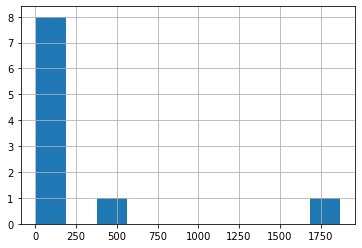

In [62]:
feat_categorical_nunique.hist();

### Clean Area column
* Remove sq.m.
* Change type to int

In [41]:
test_df_clean['Area'] = test_df_clean['Area'].apply(lambda x: x.replace(u'\xa0', '').replace('кв.м',''))
test_df_clean['Area'] = test_df_clean['Area'].astype(float)
test_df_clean['Area']

0       69.0
1       64.0
2       63.0
3      174.0
4       72.0
       ...  
195     75.0
196     92.0
197     60.0
198     30.0
199    160.0
Name: Area, Length: 200, dtype: float64

### Clean Year of construction

In [42]:
def cleanYear(el):
    if el is not np.nan:
        return el.replace(u'\xa0', ' ').replace(' г. (годината може да е ориентировъчна)','')
    else:
        return 0
test_df_clean['Year of construction'] = test_df_clean['Year of construction'].apply(cleanYear)
# test_df_clean['Year of construction'] = test_df_clean['Year of construction'].fillna(0)
test_df_clean['Year of construction'] = test_df_clean['Year of construction'].astype(int)
test_df_clean['Year of construction']

0      2009
1      1990
2      1990
3      2017
4      1970
       ... 
195    2015
196    1986
197    2007
198    1995
199    2021
Name: Year of construction, Length: 200, dtype: int64

### Clean Level of completion

In [43]:
test_df_clean['Level of completion'].unique()

array(['Готов (завършен)', 'В строеж', nan, 'В проект'], dtype=object)

### Change type of price

In [44]:
test_df_clean['price'] = test_df_clean['price'].astype(int)
test_df_clean['price']

0      135000
1       80000
2       89000
3      260000
4      137900
        ...  
195    120000
196    127000
197     99000
198     46000
199    191000
Name: price, Length: 200, dtype: int64

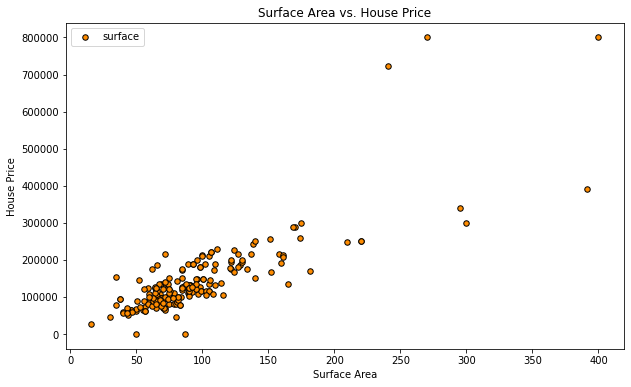

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(test_df_clean['Area'],test_df_clean['price'], s=30, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("Surface Area")
plt.ylabel("House Price")
plt.title("Surface Area vs. House Price")
plt.legend()
plt.show()

### Add column squared meter price

In [48]:
test_df_clean['Price per sq.m'] = test_df_clean['price']/test_df_clean['Area']

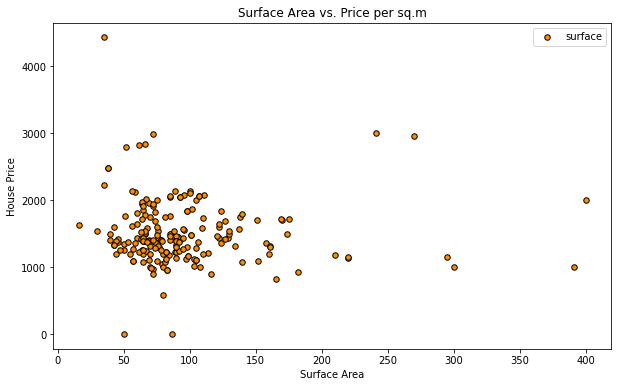

In [49]:
plt.figure(figsize=(10,6))
plt.scatter(test_df_clean['Area'],test_df_clean['Price per sq.m'], s=30, edgecolor="black",c="darkorange", label="surface")
plt.xlabel("Surface Area")
plt.ylabel("House Price")
plt.title("Surface Area vs. Price per sq.m")
plt.legend()
plt.show()

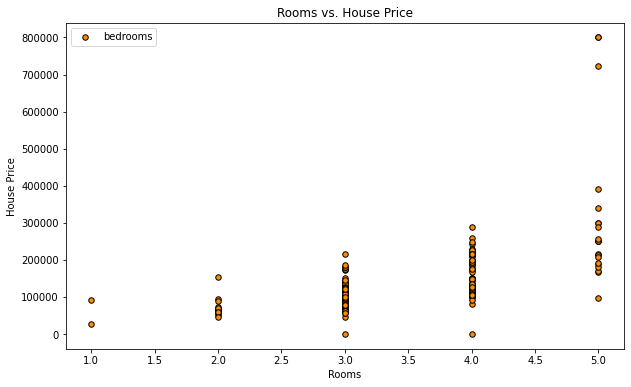

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(test_df_clean['Rooms'],test_df_clean['price'], s=30, edgecolor="black",c="darkorange", label="bedrooms")
plt.xlabel("Rooms")
plt.ylabel("House Price")
plt.title("Rooms vs. House Price")
plt.legend()
plt.show()

In [51]:
test_df_clean[test_df_clean.columns[8:-2]] = test_df_clean[test_df_clean.columns[8:-2]].fillna(0).astype(int)

### Floor cleaning 

In [117]:
# # test_df_clean['Floor number'] = test_df_clean['Floor number'].apply(lambda x: x.replace('0', ' '))
# test_df_clean['Floor number'] = test_df_clean['Floor number'].apply(lambda x: x.replace(u'\xa0', ' ').replace(' етаж',''))
# test_df_clean['Floor number'] = test_df_clean['Floor number'].astype(int)
# # test_df_clean['Floor number'][test_df_clean['Floor number'] == 0]
# test_df_clean.head()

In [116]:
# plt.figure(figsize=(10,6))
# plt.scatter(test_df_clean['Floor number'],test_df_clean['Price per sq.m'], s=30, edgecolor="black",c="darkorange", label="bedrooms")
# plt.xlabel("Floor")
# plt.ylabel("House Price")
# plt.title("Rooms vs. House Price")
# plt.legend()
# plt.show()

In [118]:
# test_df_clean.columns[8:-2]

In [119]:
# test_df_clean.head()

In [ ]:
target= np.array(test_df_clean['price'])
features = test_df_clean[['Area','Year of construction','Floor number']]
feature_list = list(features.columns)
features = np.array(features)

## RANDOM FOREST - KFOLD AND MODEL 


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

In [64]:
target= np.array(test_df_clean['price'])
features = test_df_clean[['Area','Year of construction',
                          'Elevator', 'Furnished', 'Rehabilitated', 'After renovation', 'TEC',
       'price', 'Lyulin 3', 'Local heating', 'Unfurnished', 'Lyulin 2',
       'Turnkey', 'Boyana', 'Panorama of the mountain', 'Medical Academy',
       'Camp', 'Lyulin 5', 'Garage / Parking space', 'Ovcha Kupel 1', 'Peel',
       'Center', 'Hadji Dimitar', 'Lozenets', 'Swelling', 'Dragalevtsi',
       'Gasified', 'The refrigerator', 'Leasing', 'Porter / Security',
       'Gotse Delchev', 'Youth 3', 'Vrabnica 1', 'The White birches',
       'Raspberry Valley', 'Fireplace', 'Яворов', 'Bedbug', 'm. Gardova glava',
       'Karpuzitsa', 'Ovcha Kupel', 'Buxton', 'Replacement / Barter',
       'Students\' town', 'Vitosha', 'Lyulin 8', 'Lyulin 7', 'Oborishte',
       'Youth 1', 'The nursery', 'Krasna Polyana', 'Levski', 'Slatina',
       'Geo Milev', 'Youth 4', 'East', 'Ivan Vazov', 'Zone B19', 'Lyulin 10',
       'Friendship 2', 'Friendship 1', 'Knyazhevo', 'Botunets', 'Obelya 2',
       'Banishora', 'Landfill', 'Youth 2', 'Redoubt', 'Hope 1', 'Cross Water',
       'Krasno Selo', 'Zone B5', 'Hope 4', 'dry river',
       'Acting American College', 'Hippodrome', 'Lyulin 6', 'Simeonovo',
       'Lyulin 4']]
features = np.array(features)

## RANDOM FOREST - KFOLD AND MODEL 


from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 1000, 
                               random_state = 42, 
                               criterion = 'mse',
                               bootstrap=True)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)

Mean Absolute Error: 825.39
Accuracy: 99.33 %.
Mean Absolute Error: 1002.59
Accuracy: 99.05 %.
Mean Absolute Error: 11257.82
Accuracy: 97.79 %.
Mean Absolute Error: 13340.17
Accuracy: 97.59 %.
Mean Absolute Error: 425.59
Accuracy: 99.63 %.
Mean Absolute Error: 7562.21
Accuracy: 97.75 %.
Mean Absolute Error: 7100.23
Accuracy: -130292.1 %.
Mean Absolute Error: 4832.74
Accuracy: 97.8 %.
Mean Absolute Error: 2138.44
Accuracy: 98.84 %.
Mean Absolute Error: 1362.75
Accuracy: 99.12 %.
Average accuracy: -12940.520093794472


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_train, target_train)

print(rf_random.best_params_)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
    
kf = KFold(n_splits=10,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(features):

    data_train   = features[train_index]
    target_train = target[train_index]

    data_test    = features[test_index]
    target_test  = target[test_index]

    rf = RandomForestRegressor(n_estimators = 400, 
                               random_state = 42, 
                               criterion = 'mse',
                               min_samples_leaf = 1,
                               min_samples_split= 2,
                               max_features = 'sqrt',
                               bootstrap=False,
                               max_depth = None)
    
    rf.fit(data_train, target_train)

    predictions = rf.predict(data_test)

    errors = abs(predictions - target_test)

    print('Mean Absolute Error:', round(np.mean(errors), 2))
    
    mape = 100 * (errors / target_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print('Average accuracy:', average_accuracy)


In [ ]:
npices = np.array(prices).astype('int')
ps = pd.Series(npices)
ps = ps[(ps > 10000) & (ps < 500000)]
ps.describe()

In [ ]:
npices2 = np.array(prices).astype('int')
ps2 = pd.DataFrame(npices2)
ps2.to_csv('prices.csv', index=False)

In [ ]:
pr = pd.read_csv('prices.csv')
pr['price'].plot.box()

In [ ]:
plt.figure(figsize=(12,8))
plt.boxplot(pr[(pr['price'] < 500000) & (pr['price'] > 10000)])

plt.show()
# pr.describe()